Machine Learning concepts and data analysis

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

org_data = pd.read_csv("/kaggle/input/medical-insurance-cost-dataset/insurance.csv")

**Understanding the dataset**

In [2]:
print("Number of rows and columns " , org_data.shape)
print(org_data.info())
print(org_data.describe())
print(org_data.head())

Number of rows and columns  (1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34

**Checking the missing and duplicate data**

In [3]:
#Creating a copy of the data
df = org_data.copy()
print(df.isnull().sum())
print("Checking the duplicated data : " ,df.duplicated().sum())

df.drop_duplicates(inplace=True)
print("After dropping the duplicated data : " ,df.duplicated().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Checking the duplicated data :  1
After dropping the duplicated data :  0


In this step , i am going to convert the categorical data into numerical data.

* Sex : Male / Female = (1,0) using label Encoder

* Smoker : Yes /No = 1, 0 using label Encoder

* Region : 1 0 0 0 using one hot encoding

In [4]:

# Label Encoding for binary categorical variables
df['sex_encoded'] = LabelEncoder().fit_transform(df['sex'])
df['smoker_encoded'] = LabelEncoder().fit_transform(df['smoker'])

# One-Hot Encoding for region (only once)
ohe = OneHotEncoder(sparse_output=False, drop='first')
region_encoded = ohe.fit_transform(df[['region']])

# Convert to DataFrame
region_df = pd.DataFrame(region_encoded, columns=ohe.get_feature_names_out(['region']) ,index=df.index)

# Merge and drop originals
df = pd.concat([df, region_df], axis=1)
df.drop(['sex', 'smoker', 'region'], axis=1, inplace=True)

print(df.shape)
print(df.head())

(1337, 9)
   age     bmi  children      charges  sex_encoded  smoker_encoded  \
0   19  27.900         0  16884.92400            0               1   
1   18  33.770         1   1725.55230            1               0   
2   28  33.000         3   4449.46200            1               0   
3   33  22.705         0  21984.47061            1               0   
4   32  28.880         0   3866.85520            1               0   

   region_northwest  region_southeast  region_southwest  
0               0.0               0.0               1.0  
1               0.0               1.0               0.0  
2               0.0               1.0               0.0  
3               1.0               0.0               0.0  
4               1.0               0.0               0.0  


**Splitting the data into 80 - 20**

In [5]:
#Defines Features and labels
X = df.drop("charges", axis=1)
y=df['charges']

#Splitting the data into 80 for training and 20 for testing
X_train , X_test , y_train , y_test = train_test_split(X , y  ,test_size=0.2 , random_state=42)
print("Training data : \n", X_train)
print("Training data : \n", y_train)
print("Testing data : \n", X_test )
print("Testing data : \n", y_test )

Training data : 
       age     bmi  children  sex_encoded  smoker_encoded  region_northwest  \
1114   23  24.510         0            1               0               0.0   
968    21  25.745         2            1               0               0.0   
599    52  37.525         2            0               0               1.0   
170    63  41.470         0            1               0               0.0   
275    47  26.600         2            0               0               0.0   
...   ...     ...       ...          ...             ...               ...   
1096   51  34.960         2            0               1               0.0   
1131   27  45.900         2            1               0               0.0   
1295   20  22.000         1            1               0               0.0   
861    38  28.000         3            0               0               0.0   
1127   35  35.860         2            0               0               0.0   

      region_southeast  region_southwest  
11

**Training the model and predicting the Charges using xtest data**

In [6]:
#Creating objects for model 
model = LinearRegression()

#Training the model
model.fit(X_train, y_train)

#Predicting the values from the same dataset using train_test_split
y_pred = model.predict(X_test)

In [7]:
# Check coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [  248.21072022   318.70144095   533.0099888   -101.54205399
 23077.76459287  -391.76145478  -838.91961573  -659.13975155]
Intercept: -11092.652295945947


**Highest Coefficient of smoker makes the biggest effect, then age and BMI. Children and region matter a little, sex hardly matters.**

**Model Evaluation**

In [8]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test , y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error : " , mae)
print("Mean Square Error : " , mse)
print("Root Mean Square error : " , rmse)
print("R2 score : " , r2)

Mean Absolute Error :  4177.045561036319
Mean Square Error :  35478020.67523561
Root Mean Square error :  5956.342894363588
R2 score :  0.8069287081198011


On average, predictions are off by about 4177 from the actual insurance charges.


On average, model’s predictions are about 5956 away from the true charges. RMSE is usually a bit larger than MAE because of how it penalizes big errors.


This means your model explains about 80.7% of the variance in insurance charges.
A value of 0.80+ is actually very good for real-world data (because insurance charges are quite noisy and depend on many unobserved factors).


**Doing visualization of data for better understanding**

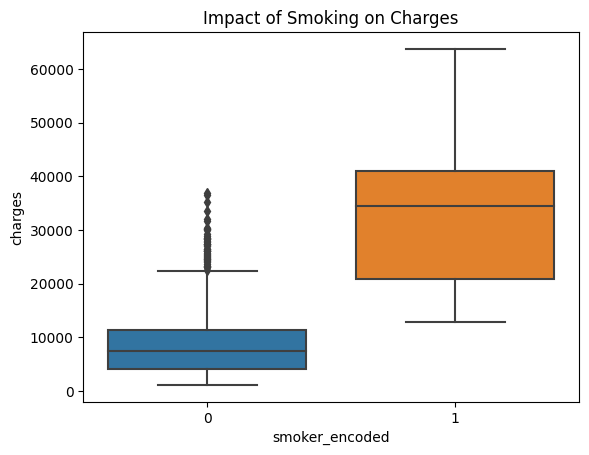

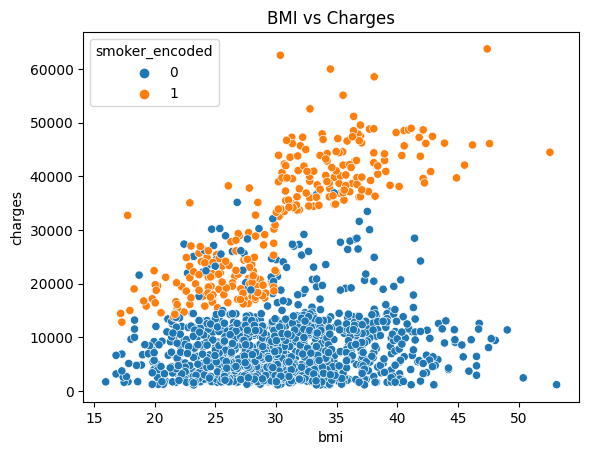

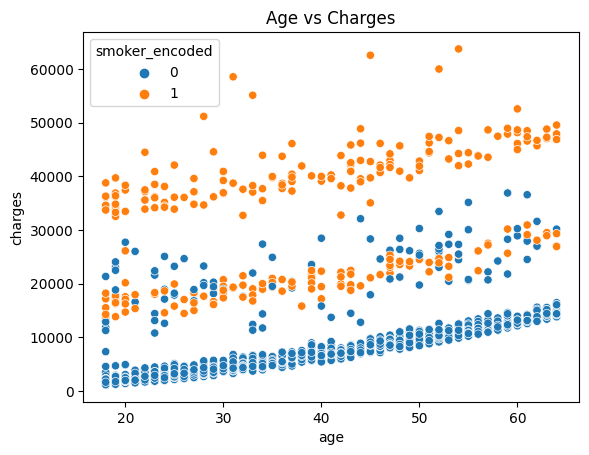

<Figure size 640x480 with 0 Axes>

In [9]:
# Smoking impact on charges
sns.boxplot(x="smoker_encoded", y="charges", data=df)
plt.title("Impact of Smoking on Charges")
plt.show()


# BMI vs Charges (colored by smoker status)
sns.scatterplot(x="bmi", y="charges", hue="smoker_encoded", data=df)
plt.title("BMI vs Charges")
plt.show()

# Age vs Charges
sns.scatterplot(x="age", y="charges", hue="smoker_encoded", data=df)
plt.title("Age vs Charges")
plt.show()
plt.savefig("Impactpfsmoking.png") 